In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

In [2]:
epochs = 10  # 訓練的次數
img_rows = None # 影像檔的高
img_cols = None # 影像檔的寬
x_list = list() # 存所有影像的array
y_list = list() # 存所有名稱的 array
x_train = list()
y_train = list()
x_test = list()
y_test = list()


In [3]:
path = 'training(new)/'

In [4]:
folder_filenames = os.listdir(path)
folder_filenames

['abdomen',
 'clavicle',
 'lower',
 'lung(lower)',
 'lung(upper)',
 'other',
 'upper']

In [5]:

i = 0
for folder_filename in folder_filenames:
    for img_filename in os.listdir(path+folder_filename):
        if '.png' not in img_filename:
            continue
        img = load_img((path+folder_filename+'/{0}').format(img_filename, color_mode = 'grayscale'))
        img = img.convert('L')
        img_array = img_to_array(img)
        # n = img_array[464:976,704:1216]
        n = img_array
        n = (n - np.min(n)) / (np.max(n)-np.min(n))
        
        #n = np.where(n>np.mean(n), 255, 0)
        
        x_list.append(n)
        y_list.append(i)
        
        (img_rows, img_columns ) = img_array.shape[0], img_array.shape[1]
    i = i + 1

In [6]:
y_list = keras.utils.to_categorical(y_list, num_classes=10)

In [7]:
#np.save('x_list', x_list)
#np.save('y_list', y_list)

In [8]:
# 將訓練資料拆分成測試集 驗證集
x_train, x_test, y_train, y_test = train_test_split(x_list, y_list)

In [9]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [10]:
# x_train = x_train  / 255
# x_test = x_test / 255

In [11]:
img_rows,img_columns

(512, 512)

In [12]:
x_train.shape

(379, 512, 512, 1)

In [13]:

#if os.path.isfile('cnn_model.h5'):
    #model = models.load_model('cnn_model.h5')
    #print('Model loaded from file.')
#else:

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding ='same', input_shape=(512, 512, 1 ),activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(10, activation='softmax'))
print('New model created.')
 
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


New model created.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1048576)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
train_history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
3/3 [==============================] - 62s 21s/step - loss: 0.9900 - accuracy: 0.1900 - val_loss: 0.6845 - val_accuracy: 0.3701
Epoch 2/10
3/3 [==============================] - 62s 21s/step - loss: 0.9037 - accuracy: 0.3245 - val_loss: 0.2222 - val_accuracy: 0.5827
Epoch 3/10
3/3 [==============================] - 73s 24s/step - loss: 0.2373 - accuracy: 0.5172 - val_loss: 0.1886 - val_accuracy: 0.5984
Epoch 4/10
3/3 [==============================] - 58s 19s/step - loss: 0.1691 - accuracy: 0.7230 - val_loss: 0.1120 - val_accuracy: 0.8110
Epoch 5/10
3/3 [==============================] - 63s 21s/step - loss: 0.0984 - accuracy: 0.8338 - val_loss: 0.0598 - val_accuracy: 0.8898
Epoch 6/10
3/3 [==============================] - 61s 20s/step - loss: 0.0557 - accuracy: 0.9077 - val_loss: 0.0483 - val_accuracy: 0.8976
Epoch 7/10
3/3 [==============================] - 63s 21s/step - loss: 0.0418 - accuracy: 0.9288 - val_loss: 0.0550 - val_accuracy: 0.8819
Epoch 8/10
3/3 [===========

In [16]:
def show_train_history(title,train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(title)
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.savefig(title+'png')
    plt.show()

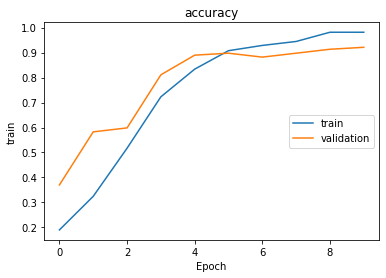

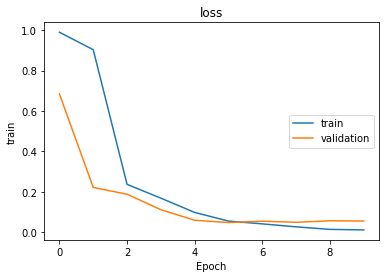

In [17]:
show_train_history('accuracy',train_history,'accuracy','val_accuracy')
show_train_history('loss',train_history,'loss','val_loss')

In [18]:
model.save('training(new).h5')

In [19]:
scores = model.evaluate(x_test,y_test)

4/4 [==============================] - 2s 514ms/step - loss: 0.0559 - accuracy: 0.9213


In [20]:
test_list = list()
ans_list = list()

In [ ]:

        
             


test_path = 'patient007/'
    
for img_filename in os.listdir(test_path):
    if '.png' not in img_filename:
        continue
        
    img = load_img((test_path+'/{0}').format(img_filename, color_mode = 'grayscale'))
    img = img.convert('L')
    img_array = img_to_array(img)
        
    n = img_array
    n = (n - np.min(n)) / (np.max(n)-np.min(n))
    #n = np.where(n>np.mean(n), 255, 0)
    # ans_list.append(i)
    test_list.append(n)
    
        
       
        
       
        

In [ ]:
test_list = np.array(test_list)


In [ ]:
plt.imshow(test_list[0])

In [ ]:
test_list.shape

In [ ]:
predict_list = model.predict_classes(test_list)

In [ ]:
print(predict_list)

In [ ]:
ans_list = np.array(ans_list)


In [ ]:
compare = predict_list - ans_list

In [ ]:
compare